<a href="https://colab.research.google.com/github/Vikasgithubpro/2-Minutes-Labs-Solutions/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fake News Detection**

In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

Importing Dataset

In [258]:
df_fake = pd.read_csv("/content/Fake.csv")
df_true = pd.read_csv("/content/True.csv")

In [259]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [260]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [261]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


Inserting a column "class" as target feature

In [262]:
df_fake["class"] = 0
df_true["class"] = 1

In [263]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [264]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)


df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [265]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [266]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

In [267]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [268]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [269]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

Merging True and Fake Dataframes

In [270]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [271]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

Removing columns which are not required

In [272]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [273]:
df.isnull().sum()

,0
text,0
class,0


Random Shuffling the dataframe

In [274]:
df = df.sample(frac = 1)

In [275]:
df.head()

,text,class
6746,SEATTLE (Reuters) - Donald Trump on Monday wid...,1
14905,SEOUL (Reuters) - The United States top negot...,1
4266,Donald Trump fell on his face repeatedly durin...,0
10537,Democratic Rep. Jan Schakowsky (Ill.) is marri...,0
11070,It s a sad day in New Orleans Cultural Marxism...,0


In [276]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [277]:
df.columns

Index(['text', 'class'], dtype='object')

In [278]:
df.head()

,text,class
0,SEATTLE (Reuters) - Donald Trump on Monday wid...,1
1,SEOUL (Reuters) - The United States top negot...,1
2,Donald Trump fell on his face repeatedly durin...,0
3,Democratic Rep. Jan Schakowsky (Ill.) is marri...,0
4,It s a sad day in New Orleans Cultural Marxism...,0


Creating a function to process the texts

In [279]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [280]:
df["text"] = df["text"].apply(wordopt)

Defining dependent and independent variables

In [281]:
x = df["text"]
y = df["class"]

Splitting Training and Testing

In [282]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

Convert text to vectors

In [283]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

**Logistic Regression**

In [284]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [285]:
pred_lr=LR.predict(xv_test)

In [286]:
LR.score(xv_test, y_test)

0.9874331550802139

In [287]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5819
           1       0.99      0.99      0.99      5401

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



**Decision Tree Classification**

In [288]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [289]:
pred_dt = DT.predict(xv_test)

In [290]:
DT.score(xv_test, y_test)

0.9955436720142602

In [291]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5819
           1       1.00      0.99      1.00      5401

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



**Gradient Boosting Classifier**

In [292]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [293]:
pred_gbc = GBC.predict(xv_test)

In [294]:
GBC.score(xv_test, y_test)

0.9948306595365419

In [295]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5819
           1       0.99      1.00      0.99      5401

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



**Random Forest Classifier**

In [296]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [297]:
pred_rfc = RFC.predict(xv_test)

In [298]:
RFC.score(xv_test, y_test)

0.9879679144385026

In [299]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5819
           1       0.99      0.99      0.99      5401

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



Model Testing

In [300]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GBC[0]),
                                                                                                              output_lable(pred_RFC[0])))

In [301]:
news = str(input())
manual_testing(news)

WEST PALM BEACH, Fla./WASHINGTON (Reuters) - The White House said on Friday it was set to kick off talks next week with Republican and Democratic congressional leaders on immigration policy, government spending and other issues that need to be wrapped up early in the new year. The expected flurry of legislative activity comes as Republicans and Democrats begin to set the stage for midterm congressional elections in November. President Donald Trumpâ€™s Republican Party is eager to maintain control of Congress while Democrats look for openings to wrest seats away in the Senate and the House of Representatives. On Wednesday, Trumpâ€™s budget chief Mick Mulvaney and legislative affairs director Marc Short will meet with Senate Majority Leader Mitch McConnell and House Speaker Paul Ryan - both Republicans - and their Democratic counterparts, Senator Chuck Schumer and Representative Nancy Pelosi, the White House said. That will be followed up with a weekend of strategy sessions for Trump, Mc

In [302]:
news = str(input())
manual_testing(news)

On Christmas day, Donald Trump announced that he would  be back to work  the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump is on track to outpace the number of golf games his predecessor played.Updated my tracker of Trump s appearances at Trump properties.71 rounds of golf including today s. At this pace, he ll pass Obama s first-term total by July 24 next year. https://t.co/Fg7VacxRtJ pic.twitter.com/5gEMcjQTbH  Philip Bump (@pbump) December 29, 2017 That makes what a Washington Post reporter discovered on Trump s website really weird, but everything about this administration is bizarre AF. The coding contained a reference to Obama and golf:  Unlike Obama, we are working to fix the problem   and not on the golf course.  However, the coding wasn t done correctly.The website of Donald Trump, who has spent several days in a row at the golf course, is coded to serve up the fol

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [304]:
df = pd.read_csv('/content/fake_news_dataset.csv')

In [305]:
df.head()

,id,title,author,text,state,date_published,source,category,sentiment_score,word_count,...,num_shares,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
0,1,Breaking News 1,Jane Smith,This is the content of article 1. It contains ...,Tennessee,30-11-2021,The Onion,Entertainment,-0.22,1302,...,47305,450,Center,FALSE,1,76,6,0.84,53.35,Fake
1,2,Breaking News 2,Emily Davis,This is the content of article 2. It contains ...,Wisconsin,02-09-2021,The Guardian,Technology,0.92,322,...,39804,530,Left,Mixed,1,1,5,0.85,28.28,Fake
2,3,Breaking News 3,John Doe,This is the content of article 3. It contains ...,Missouri,13-04-2021,New York Times,Sports,0.25,228,...,45860,763,Center,Mixed,0,57,1,0.72,0.38,Fake
3,4,Breaking News 4,Alex Johnson,This is the content of article 4. It contains ...,North Carolina,08-03-2020,CNN,Sports,0.94,155,...,34222,945,Center,TRUE,1,18,10,0.92,32.20,Fake
4,5,Breaking News 5,Emily Davis,This is the content of article 5. It contains ...,California,23-03-2022,Daily Mail,Technology,-0.01,962,...,35934,433,Right,Mixed,0,95,6,0.66,77.70,Real


In [306]:
df.tail()


,id,title,author,text,state,date_published,source,category,sentiment_score,word_count,...,num_shares,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
3995,3996,Breaking News 3996,John Doe,This is the content of article 3996. It contai...,Ohio,25-04-2020,InfoWars,Technology,0.91,1227,...,38880,697,Right,Mixed,0,29,10,0.22,95.46,Fake
3996,3997,Breaking News 3997,Alex Johnson,This is the content of article 3997. It contai...,Washington,09-01-2022,CNN,Sports,-0.57,1296,...,3650,925,Left,FALSE,1,53,3,0.42,16.54,Fake
3997,3998,Breaking News 3998,Alex Johnson,This is the content of article 3998. It contai...,California,03-03-2023,Breitbart,Entertainment,-0.17,522,...,35391,577,Left,FALSE,0,22,9,0.50,28.51,Fake
3998,3999,Breaking News 3999,John Doe,This is the content of article 3999. It contai...,Illinois,13-04-2021,New York Times,Health,-0.88,169,...,40424,201,Left,FALSE,1,3,6,0.17,71.16,Real
3999,4000,Breaking News 4000,John Doe,This is the content of article 4000. It contai...,Texas,20-12-2023,The Guardian,Health,-0.95,465,...,48913,279,Right,TRUE,1,73,4,0.09,27.65,Real


In [307]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4000 non-null   int64  
 1   title              4000 non-null   object 
 2   author             4000 non-null   object 
 3   text               4000 non-null   object 
 4   state              4000 non-null   object 
 5   date_published     4000 non-null   object 
 6   source             4000 non-null   object 
 7   category           4000 non-null   object 
 8   sentiment_score    4000 non-null   float64
 9   word_count         4000 non-null   int64  
 10  char_count         4000 non-null   int64  
 11  has_images         4000 non-null   int64  
 12  has_videos         4000 non-null   int64  
 13  readability_score  4000 non-null   float64
 14  num_shares         4000 non-null   int64  
 15  num_comments       4000 non-null   int64  
 16  political_bias     4000 

In [308]:
df.describe()


,id,sentiment_score,word_count,char_count,has_images,has_videos,readability_score,num_shares,num_comments,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score
count,4000.000000,4000.000000,4000.000000,4000.0000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000
mean,2000.500000,-0.000645,795.655750,4277.0680,0.49650,0.484500,54.764595,25144.596750,489.870250,0.497000,49.960750,5.54925,0.494447,50.598110
std,1154.844867,0.574768,406.373871,2186.2073,0.50005,0.499822,14.404027,14387.537467,287.435733,0.500054,29.467911,2.87422,0.289138,28.932298
min,1.000000,-1.000000,100.000000,500.0000,0.00000,0.000000,30.020000,39.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.040000
25%,1000.750000,-0.490000,445.750000,2358.7500,0.00000,0.000000,42.480000,12781.750000,238.000000,0.000000,24.000000,3.00000,0.240000,25.915000
50%,2000.500000,-0.010000,793.000000,4287.0000,0.00000,0.000000,54.235000,25308.500000,483.000000,0.000000,50.000000,6.00000,0.490000,51.480000
75%,3000.250000,0.510000,1150.000000,6206.5000,1.00000,1.000000,67.215000,37453.500000,741.000000,1.000000,76.000000,8.00000,0.740000,75.580000
max,4000.000000,1.000000,1500.000000,7996.0000,1.00000,1.000000,79.980000,50000.000000,1000.000000,1.000000,100.000000,10.00000,1.000000,99.950000


In [309]:
df.dtypes


,0
id,int64
title,object
author,object
text,object
state,object
date_published,object
source,object
category,object
sentiment_score,float64
word_count,int64


In [310]:
df.shape


(4000, 24)

In [311]:
df.isnull().sum()


,0
id,0
title,0
author,0
text,0
state,0
date_published,0
source,0
category,0
sentiment_score,0
word_count,0


In [312]:
df.duplicated().sum()


np.int64(0)

In [313]:
df.columns


Index(['id', 'title', 'author', 'text', 'state', 'date_published', 'source',
       'category', 'sentiment_score', 'word_count', 'char_count', 'has_images',
       'has_videos', 'readability_score', 'num_shares', 'num_comments',
       'political_bias', 'fact_check_rating', 'is_satirical', 'trust_score',
       'source_reputation', 'clickbait_score', 'plagiarism_score', 'label'],
      dtype='object')

# Data visualizations

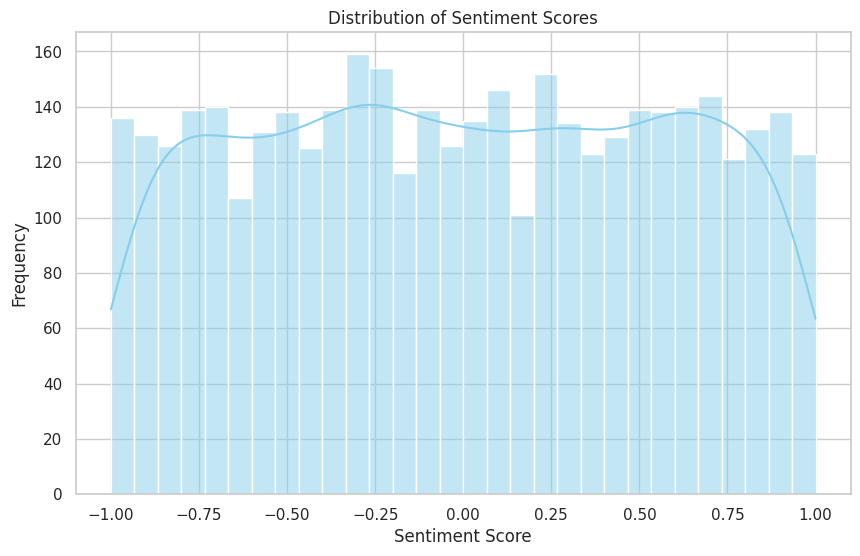

In [314]:
# Set Seaborn style
sns.set(style="whitegrid")

# 1. Distribution of Sentiment Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

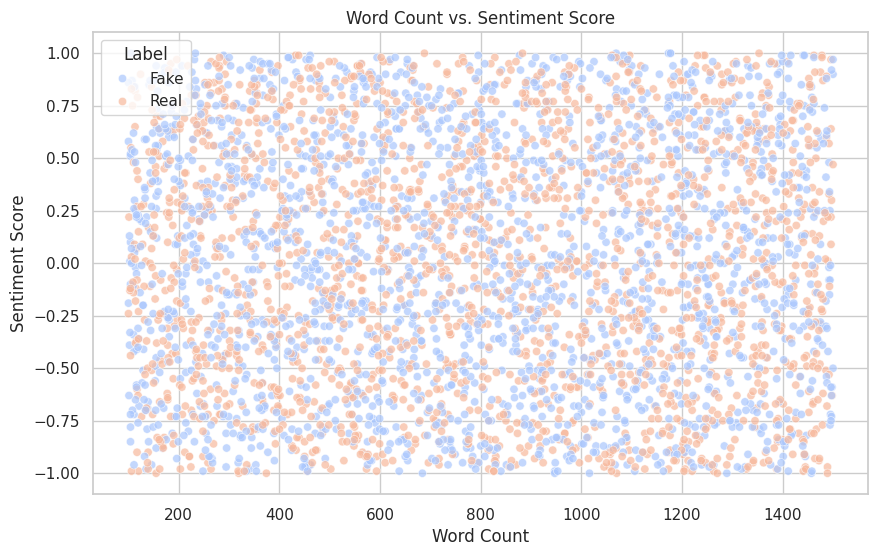

In [315]:
# 2. Word Count vs. Sentiment Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='word_count', y='sentiment_score', hue='label', palette='coolwarm', alpha=0.7)
plt.title('Word Count vs. Sentiment Score')
plt.xlabel('Word Count')
plt.ylabel('Sentiment Score')
plt.legend(title='Label')
plt.show()

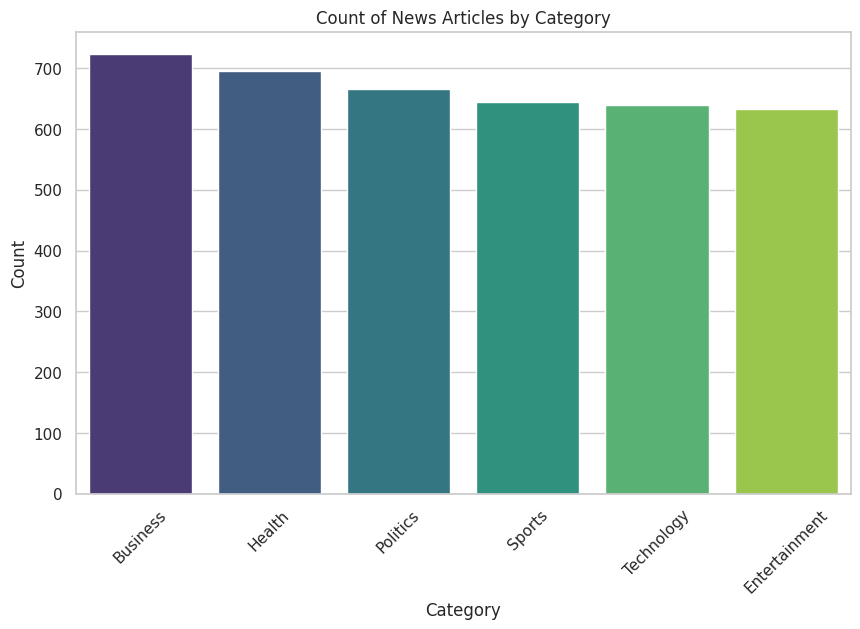

In [316]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index, palette='viridis')
plt.title('Count of News Articles by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

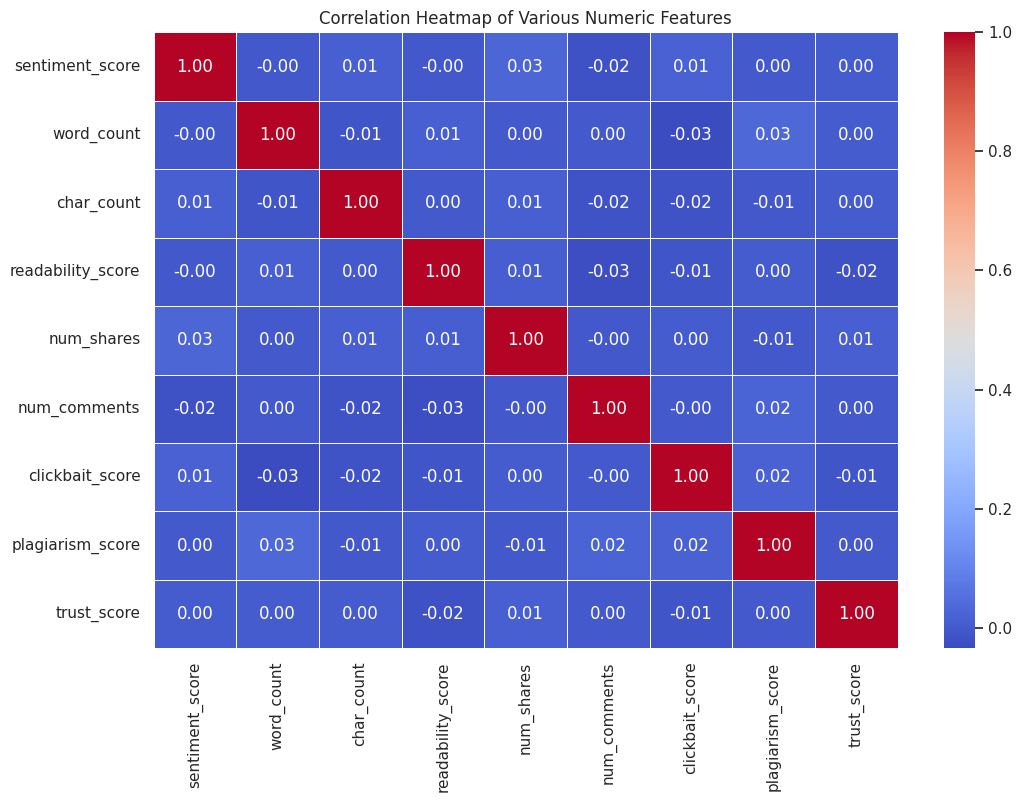

In [317]:
# 4. Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[['sentiment_score', 'word_count', 'char_count', 'readability_score',
                         'num_shares', 'num_comments', 'clickbait_score', 'plagiarism_score', 'trust_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Various Numeric Features')
plt.show()

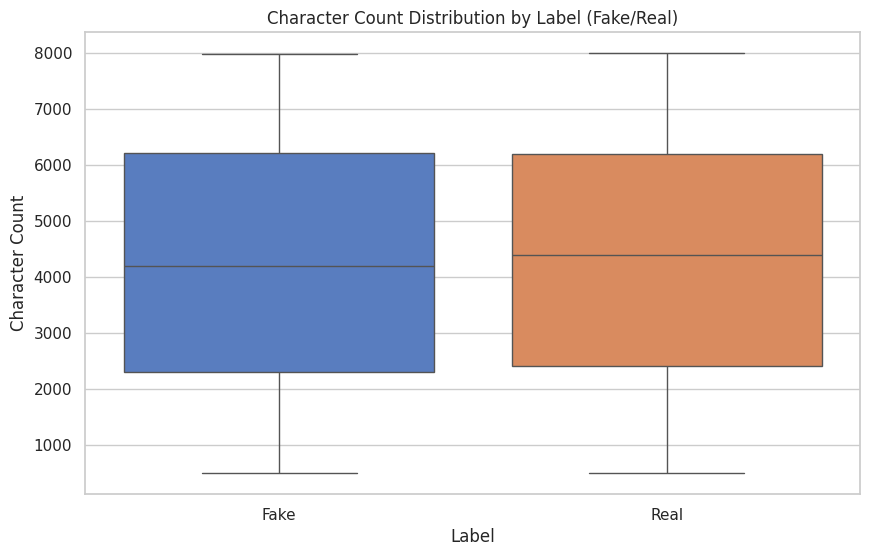

In [318]:
# 5. Distribution of Article Length (Character Count) by Label (Fake/Real)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='char_count', palette='muted')
plt.title('Character Count Distribution by Label (Fake/Real)')
plt.xlabel('Label')
plt.ylabel('Character Count')
plt.show()

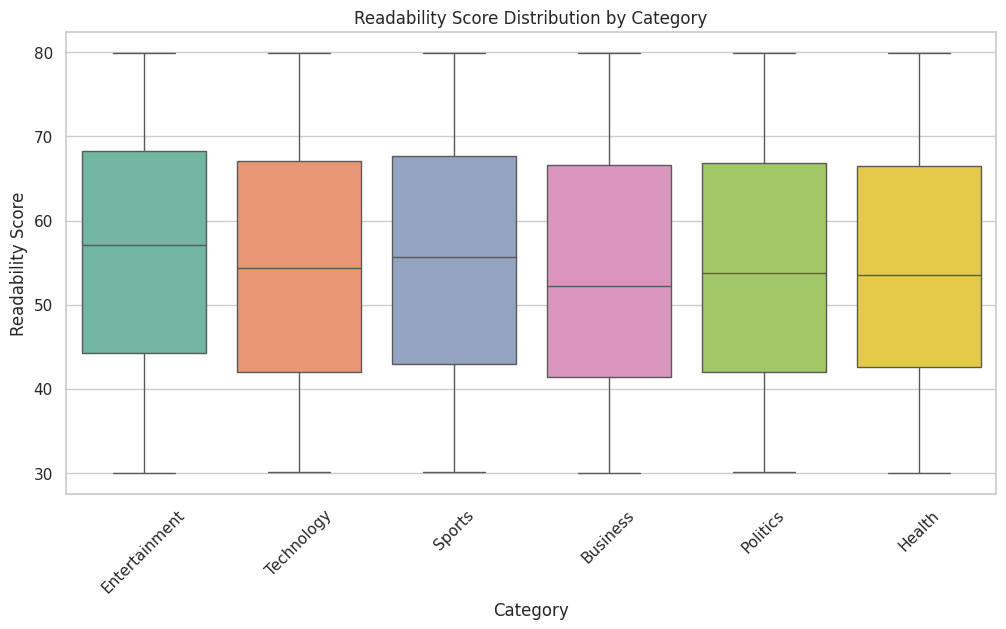

In [319]:
# 6. Article Readability Score Distribution by Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='category', y='readability_score', palette='Set2')
plt.title('Readability Score Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Readability Score')
plt.xticks(rotation=45)
plt.show()

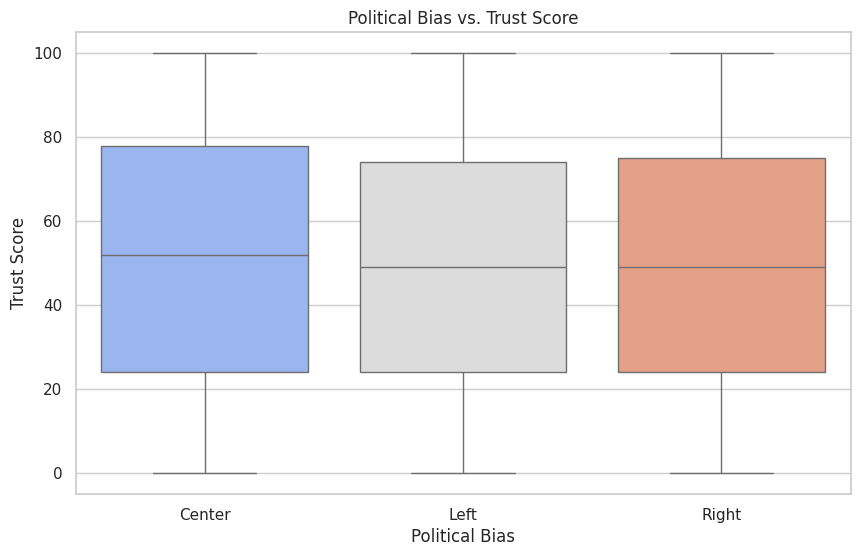

In [320]:
# 7. Political Bias vs. Trust Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='political_bias', y='trust_score', palette='coolwarm')
plt.title('Political Bias vs. Trust Score')
plt.xlabel('Political Bias')
plt.ylabel('Trust Score')
plt.show()

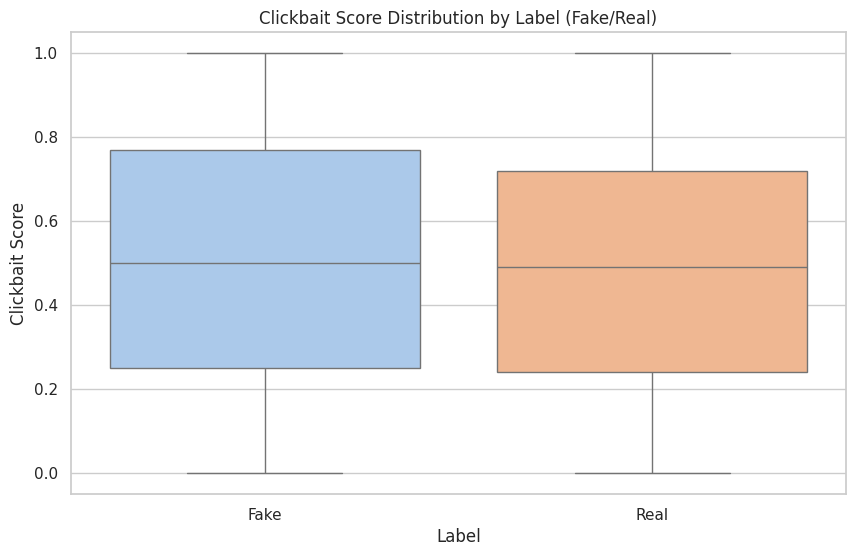

In [321]:
# 8. Distribution of Clickbait Score by Label (Fake/Real)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='clickbait_score', palette='pastel')
plt.title('Clickbait Score Distribution by Label (Fake/Real)')
plt.xlabel('Label')
plt.ylabel('Clickbait Score')
plt.show()

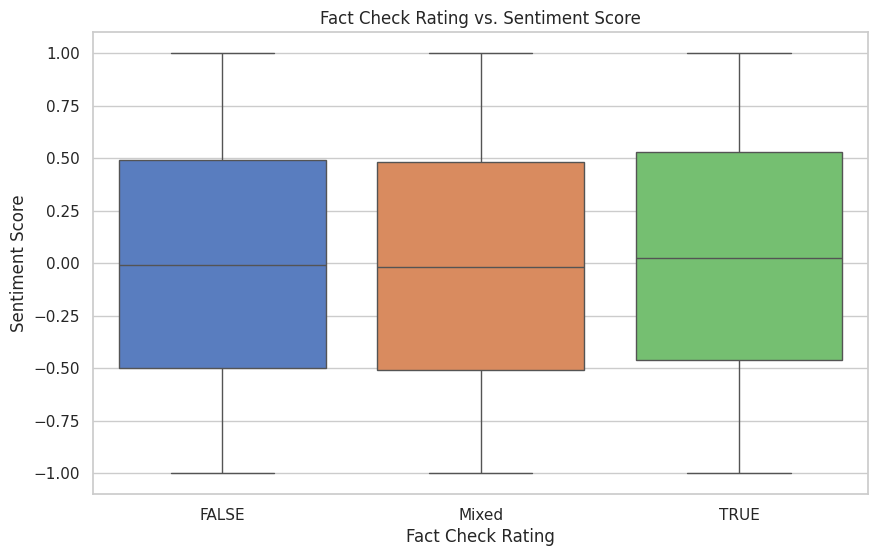

In [322]:
# 9. Fact Check Rating vs. Sentiment Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='fact_check_rating', y='sentiment_score', palette='muted')
plt.title('Fact Check Rating vs. Sentiment Score')
plt.xlabel('Fact Check Rating')
plt.ylabel('Sentiment Score')
plt.show()

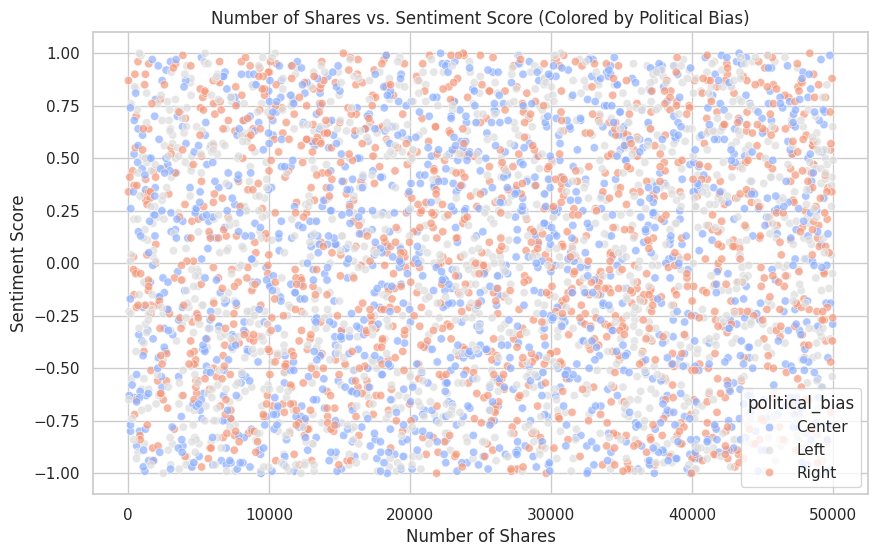

In [323]:
# 10. Number of Shares vs. Sentiment Score (Colored by Political Bias)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='num_shares', y='sentiment_score', hue='political_bias', palette='coolwarm', alpha=0.7)
plt.title('Number of Shares vs. Sentiment Score (Colored by Political Bias)')
plt.xlabel('Number of Shares')
plt.ylabel('Sentiment Score')
plt.show()